# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание задачи проекта:** используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

**Данные:** выгрузка данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

**Общий план исследования:** выполнить предобработку данных и изучить их, чтобы найти особенности и зависимости, которые существуют на рынке недвижимости.

**Навыки и инструменты, применённые в работе:** 

* **Предобработка данных**: исправление проблемы со склеиванием исходных данных, замена пропусков, изменение типов данных.
* **Расчёты и исследование данных:** добавление столбцов с расcчитанными данными(цена квадратного метра, период публикации объявления, соотношение жилой и общей площади, а также отношение площади кухни к общей), категоризация этажности квартир, сводные таблицы, множественная фильтрация, расчёт корреляции параметров. 
* **Графики:** гистограмма, линейный график, диаграмма рассеяния.

## Результаты исследования

В ходе работы над исследованием была проведена предобработка данных: 
* найдены столбцы с пропусками, % пропусков, удалены пропуски в столбцах, 
* там где это было возможно и логично (is_apartment, balcony),
* изменены типы данных в столбцах  last_price, balcony - с дробного на целочисленный, is_apartment и first_day_exposition  - из типа object на булевы значения и дату/время соответсвенно.

Далее были рассчитаны и добавлены к исходным данным столбцы:

* price_sqm - стоимость кв. метра жилья
* day_of_week_public - день недели, когда было опубликовано объявление
* month_public - месяц публикации объявления
* year_public - год публикации объявление
* part_living_area -  доля жилой площади по отношению к всей площади квартиры
* part_kitchen_area - доля площади кухни по отношению ко всей площади квартиры

В результате исследовательского анализа, чтобы избавиться выбросов к исходным данным были применены следующие ограничения:

* 'total_area' <= 200
* 'last_price'<= 20000000
* 1<='rooms'<=8
* 2.5<='ceiling_height'<=3.5

и создана таблица с отфильтрованными данными, по которым далее и проводилось исследование.

В результате которых было выявлено наибольшее влияние на стоимость квартиры по сравнению с другими параметрами (кол-во комнат, этаж, удалённость от центра), оказывает параметр площади квартиры. Период публикации объявления на стоимость квартиры влияние не оказывает.

Также была выделена зона в г.Санкт-Питербурге, которую можно отнески к центру и проведено исследование параметров, в результате которых тажке было выявлено максимальное влияние размера площади на стоимость квартиры.

Кроме того было выделено 10 населённых пунктов, лидирующих по числу обявлений: 

* Санкт-Петербург      7709
* Всеволожск            215
* посёлок Мурино        193
* посёлок Шушары        186
* Колпино               177
* Пушкин                175
* Гатчина               125
* Петергоф              121
* посёлок Парголово     118
* деревня Кудрово       11
 
и выявлено, что из десяти населённых пунктов, лидирующих по числу объявлений:
* максимальная стоимость кв.метра в Санкт-Питербурге равная 107201,
* а меньшая стоимость  - во Всеволожске, равная 66297.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла-1" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изменение-типов-данных:" data-toc-modified-id="Изменение-типов-данных:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Изменение типов данных:</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Параметр-&quot;Площадь&quot;" data-toc-modified-id="Параметр-&quot;Площадь&quot;-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Параметр "Площадь"</a></span></li><li><span><a href="#Параметр-&quot;Цена&quot;" data-toc-modified-id="Параметр-&quot;Цена&quot;-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Параметр "Цена"</a></span></li><li><span><a href="#Параметр-&quot;Число-комнат&quot;" data-toc-modified-id="Параметр-&quot;Число-комнат&quot;-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Параметр "Число комнат"</a></span></li><li><span><a href="#Параметр-&quot;Высота-потолков&quot;" data-toc-modified-id="Параметр-&quot;Высота-потолков&quot;-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Параметр "Высота потолков"</a></span></li><li><span><a href="#Параметр-&quot;Время-продажи-квартиры&quot;" data-toc-modified-id="Параметр-&quot;Время-продажи-квартиры&quot;-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Параметр "Время продажи квартиры"</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.5.1"><span class="toc-item-num">4.0.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры?</a></span><ul class="toc-item"><li><span><a href="#&quot;Площадь&quot;" data-toc-modified-id="&quot;Площадь&quot;-4.0.6.1"><span class="toc-item-num">4.0.6.1&nbsp;&nbsp;</span>"Площадь"</a></span></li><li><span><a href="#&quot;Кол-во-комнат&quot;" data-toc-modified-id="&quot;Кол-во-комнат&quot;-4.0.6.2"><span class="toc-item-num">4.0.6.2&nbsp;&nbsp;</span>"Кол-во комнат"</a></span></li><li><span><a href="#&quot;Удалённость-от-центра&quot;" data-toc-modified-id="&quot;Удалённость-от-центра&quot;-4.0.6.3"><span class="toc-item-num">4.0.6.3&nbsp;&nbsp;</span>"Удалённость от центра"</a></span></li><li><span><a href="#Удалённость-от-центра" data-toc-modified-id="Удалённость-от-центра-4.0.6.4"><span class="toc-item-num">4.0.6.4&nbsp;&nbsp;</span>Удалённость от центра</a></span></li><li><span><a href="#Период-размещения-объявления" data-toc-modified-id="Период-размещения-объявления-4.0.6.5"><span class="toc-item-num">4.0.6.5&nbsp;&nbsp;</span>Период размещения объявления</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.6.6"><span class="toc-item-num">4.0.6.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населённых-пунктов-с-наибольшим-числом-объявлений-4.0.7"><span class="toc-item-num">4.0.7&nbsp;&nbsp;</span>10 населённых пунктов с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.7.1"><span class="toc-item-num">4.0.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Квартиры-в-Санкт-Питербурге" data-toc-modified-id="Квартиры-в-Санкт-Питербурге-4.0.8"><span class="toc-item-num">4.0.8&nbsp;&nbsp;</span>Квартиры в Санкт-Питербурге</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.8.1"><span class="toc-item-num">4.0.8.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Центр-Санкт-Питербурга" data-toc-modified-id="Центр-Санкт-Питербурга-4.0.9"><span class="toc-item-num">4.0.9&nbsp;&nbsp;</span>Центр Санкт-Питербурга</a></span><ul class="toc-item"><li><span><a href="#Параметр-&quot;Площадь&quot;" data-toc-modified-id="Параметр-&quot;Площадь&quot;-4.0.9.1"><span class="toc-item-num">4.0.9.1&nbsp;&nbsp;</span>Параметр "Площадь"</a></span></li><li><span><a href="#Параметр-&quot;Цена&quot;" data-toc-modified-id="Параметр-&quot;Цена&quot;-4.0.9.2"><span class="toc-item-num">4.0.9.2&nbsp;&nbsp;</span>Параметр "Цена"</a></span></li><li><span><a href="#Параметр-&quot;Число-комнат&quot;" data-toc-modified-id="Параметр-&quot;Число-комнат&quot;-4.0.9.3"><span class="toc-item-num">4.0.9.3&nbsp;&nbsp;</span>Параметр "Число комнат"</a></span></li><li><span><a href="#Параметр-&quot;Высота-потолков&quot;" data-toc-modified-id="Параметр-&quot;Высота-потолков&quot;-4.0.9.4"><span class="toc-item-num">4.0.9.4&nbsp;&nbsp;</span>Параметр "Высота потолков"</a></span></li></ul></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры-в-центре-Санкт-Питербурга-?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры-в-центре-Санкт-Питербурга-?-4.0.10"><span class="toc-item-num">4.0.10&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры в центре Санкт-Питербурга ?</a>

## Изучение исходных данных 

Импортируем библиотеку pandas и откроем файл с помощью функции read_csv()

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df= pd.read_csv('real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В полученных данных есть очевидная проблема - данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Исправим эту ситуацию, добавив в параметр sep в функцию read_csv().

In [4]:
df= pd.read_csv('real_estate_data.csv', sep ='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Поросмотрим общую информацию о данных в таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным:

*   `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
*	`balcony` — число балконов
*   `ceiling_height` — высота потолков (м)
*	`cityCenters_nearest` — расстояние до центра города (м)
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
*	`first_day_expositio`n — дата публикации
*	`floor` — этаж
*	`floors_total` — всего этажей в доме
*	`is_apartment` — апартаменты (булев тип)
*	`kitchen_area` — площадь кухни в квадратных метрах (м²)
*	`last_price` — цена на момент снятия с публикации
*	`living_area` — жилая площадь в квадратных метрах (м²)
*	`locality_name` — название населённого пункта
*	`open_plan` — свободная планировка (булев тип)
*	`parks_around3000` — число парков в радиусе 3 км
*	`parks_nearest` — расстояние до ближайшего парка (м)
*	`ponds_around3000` — число водоёмов в радиусе 3 км
*	`ponds_nearest` — расстояние до ближайшего водоёма (м)
*	`rooms` - число комнат
*	`studio` — квартира-студия (булев тип)
*	`total_area` — площадь квартиры в квадратных метрах (м²)
*	`total_images` — число фотографий квартиры в объявлении


Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

### Промежуточный вывод

На данном этапе открыт файл с данными, исправлена проблема со склеиванием данных. Выведена общая информация о таблице, благодаря чему видна проблема с пропусками данных в ряде столбцов.

## Предобработка данных

С помощью цикла найдём столбцы, в которых есть пропуски, посчитаем их количество и %, которые пропуски в столбце составляют от всех данных:

In [6]:
print('Количество пропусков в столбцах:')
print()
for col in df:
    a = len(df[df[col].isna()]) #находим кол-во пропусков в каждом слолбце
    if a!=0: #перед выводм отбрасывем столбцы, в которых нет пропусков
        print(
        '{}: {}, что составляет {:.0%} от всех данных'.format(col, len(df[df[col].isna()]), len(df[df[col].isna()])/23699)            
         )
        print()
    

Количество пропусков в столбцах:

ceiling_height: 9195, что составляет 39% от всех данных

floors_total: 86, что составляет 0% от всех данных

living_area: 1903, что составляет 8% от всех данных

is_apartment: 20924, что составляет 88% от всех данных

kitchen_area: 2278, что составляет 10% от всех данных

balcony: 11519, что составляет 49% от всех данных

locality_name: 49, что составляет 0% от всех данных

airports_nearest: 5542, что составляет 23% от всех данных

cityCenters_nearest: 5519, что составляет 23% от всех данных

parks_around3000: 5518, что составляет 23% от всех данных

parks_nearest: 15620, что составляет 66% от всех данных

ponds_around3000: 5518, что составляет 23% от всех данных

ponds_nearest: 14589, что составляет 62% от всех данных

days_exposition: 3181, что составляет 13% от всех данных



**Столбцы, для которых нет подходящего значения на замену:** 

количественные переменные:

* floors_total(всего этажей в доме): 86, 

что составляет меннее 1% от всех данных, что может быть связано с невнимательностьтю при заполнении данных либо это может быть объявление о продаже частных одноэтажных домов, в связи с чем пользователь мог не указать этажность дома, заполнить пропуски проблематично, т.к. для этого не достаточно информации, например данных о типе дома.


* living_area(жилая площадь в квадратных метрах (м²)): 1903, что составляет 8% от всех данных
* kitchen_area(площадь кухни в квадратных метрах (м²)): 2278, что составляет 10% от всех данных

возможно, пропуски связаны с отсутствием информации о площади у продавца квариры (нет плана квартиры с отметками о площади), либо с невнимательностью при заполнении. Заполнить пропуски проблематично, т.к. средние или медианные значения могут не отражать индивидуальные особенности квартиры. Вероятно, пропуски можно было бы заполнить, если бы были данные о типе/серии дома, на основе которых можно было бы заполнить типовые значения.


* days_exposition(сколько дней было размещено объявление (от публикации до снятия)): 3181, что составляет 13% от всех данных - возможно пропуски связаны с техническими ошибками при записи данных в таблицу.

* ceiling_height(высота потолков (м)): 9195, что составляет 39% от всех данных - значительный процент пропусков, вероятно, связан с тем, что данных о высоте потолков может не быть в документации на квартиру и при продаже люди не измеряют их высоту, считая этот параметр не самым значительным.


* airports_nearest(расстояние до ближайшего аэропорта в метрах (м)): 5542, что составляет 23% от всех данных
* cityCenters_nearest(расстояние до центра города (м)): 5519, что составляет 23% от всех данных
* parks_around3000( число парков в радиусе 3 км): 5518, что составляет 23% от всех данных
* ponds_around3000(число водоёмов в радиусе 3 км): 5518, что составляет 23% от всех данных
* ponds_nearest(расстояние до ближайшего водоёма (м)): 14589, что составляет 62% от всех данных
* parks_nearest(расстояние до ближайшего парка (м)): 15620, что составляет 66% от всех данных

составляют значительный процент пропусков 23-66%, что может быть связано с техническими проблемами при определении картографических данных.


категориальные переменные:

* locality_name(название населённого пункта): 49, что составляет менее 1% от всех данных, возможно, невнимательность при заполнении объявления.

**Столбцы, в которых можно предположить логичную замену:**

* balcony(число балконов): 11519, что составляет 49% от всех данных (количественная переменная)
* is_apartment(апартаменты (булев тип)): 20924, что составляет 88% от всех данных (категориальная переменная)

-где не указаны число балконов и значение в столбце is_apartment, можем сделать предположение, что в таких случаях балкона нет и продаваемый объект не относится к типу "апартаменты", поэтому заменим пропуски в обоих столбцах на значение "0" и "False" соответсвенно.


In [7]:
df['balcony']=df['balcony'].fillna(value=0)
df['is_apartment']=df['is_apartment'].fillna(value=False)

Выполним проверку того, что пропуски в столбцах после замены отсутствуют:

In [8]:
len(df[df['balcony'].isna()])

0

In [9]:
len(df[df['is_apartment'].isna()])

0

#### Изменение типов данных:

Проверим, как изменились данные о таблице:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В результате замены пропусков в столбце is_apartment, тип данных столбца изменился с object на bool.

Замену типов данных также необходимо сделать для следующих столбцовс float64 на int, т.к. знаки после запятой в этих полях избыточны, достаточно целочисленных значений:
* last_price 
* balcony 




Для следующих столбцов замену сделать нет возможности методом astype(), т.к. в столбцах есть пропуски.

* floors_total          23613 non-null  float64 
* airports_nearest      18157 non-null  float64
* cityCenters_nearest   18180 non-null  float64
* parks_around3000      18181 non-null  float64
* parks_nearest         8079 non-null   float64
* ponds_around3000      18181 non-null  float64
* ponds_nearest         9110 non-null   float64
* days_exposition       20518 non-null  float64

In [11]:
df['last_price']=df['last_price'].astype('int') 

In [12]:
df['balcony']=df['balcony'].astype('int')

И сделаем замену типа данных для столбца first_day_exposition с типа object на тип datetime, чтобы сделать дату читабельной и удобной для дальнейшей работы с данными:

In [13]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [15]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### Вывод

На данном этапе определили какие столбцы содержат пропуски, какой процент составляют пропуски, заполнили пропуски в тех столбцах, в которых это возможно (balcony, is_apartment) и изменили типы данных в столбцах (first_day_exposition, last_price, balcony)

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу цену квадратного метра по каждому объекту:

In [16]:
df['price_sqm']=round(df['last_price']/df['total_area'])

Рассчитаем и добавим в таблицу столбцы с днём недели, месяцем и годом публикации объявления:

In [17]:
df['day_of_week_public']=df['first_day_exposition'].dt.weekday

In [18]:
df['month_public']=df['first_day_exposition'].dt.month

In [19]:
df['year_public']=df['first_day_exposition'].dt.year

In [20]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week_public,month_public,year_public
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


Выполним категоризацию этажей квартир, для этого создадим функцию, в аргумент передадим весь датафрейм и затем, передав в метод applay() созданную функцию, создадим новый столбец с категориями этажей: "Первый", "Последний", "Другой".

In [21]:
def alert_floor(df):
    if df['floor'] == 1:
        return 'Первый'
    if df['floor'] == df['floors_total']:
        return 'Последний'
    return 'Другой'

In [22]:
df['floor_category'] = df.apply(alert_floor, axis=1)

Проверим полученный результат:

In [23]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week_public,month_public,year_public,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой


Найдём соотношение жилой и общей площади для каждой квартиры и добавим соответствующий столбец:

In [24]:
df['part_living_area'] = df['living_area']/df['total_area']


Найдём отношение площади кухни к общей площади квартиры и добавим соответствующий столбец:

In [25]:
df['part_kitchen_area'] = df['kitchen_area']/df['total_area']

Проверим результат добавления столбцов в таблицу:

In [26]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week_public,month_public,year_public,floor_category,part_living_area,part_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,Другой,0.320000,0.410000


##### Вывод

На данном этапе рассчитали и добавили к таблице столбцы:

* price_sqm - стоимость кв. метра жилья
* day_of_week_public - день недели, когда было опубликовано объявление
* month_public - месяц публикации объявления
* year_public - год публикации объявление
* part_living_area -  доля жилой площади по отношению к всей площади квартиры
* part_kitchen_area - доля площади кухни по отношению ко всей площади квартиры

## Исследовательский анализ данных

#### Параметр "Площадь"

Построим гистограмму для параметра "Площадь", предварительно посмотрев с помощью функций min() и max() между какими значениями она будет построена.

In [27]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Зададим в параметре bins 100 коризин, чтобы график был более показательным:

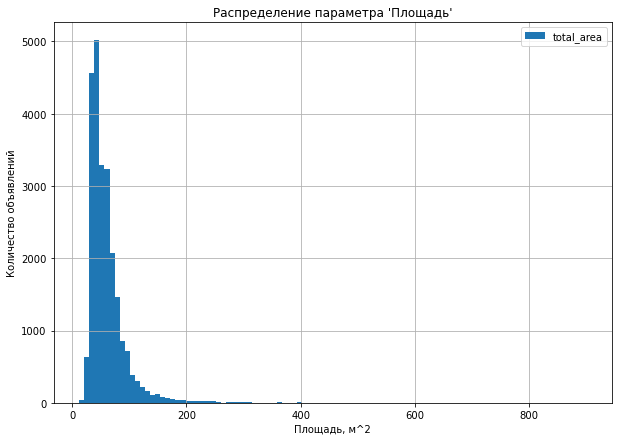

In [28]:
df.plot(kind ='hist', y='total_area', bins=100, grid=True, figsize=(10,7))
plt.xlabel("Площадь, м^2")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Площадь'")
plt.show()

Используем параметр range, чтобы изучить распределение значений total_area, находящихся в диапазоне от 12 до 300. Количество корзин оставим прежним — 100.

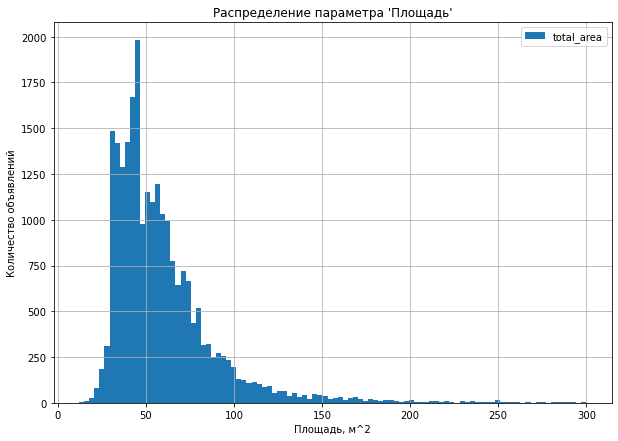

In [29]:
df.plot(kind ='hist', y='total_area', bins=100,range=(12,300), grid=True, figsize=(10,7))
plt.xlabel("Площадь, м^2")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Площадь'")
plt.show()

Нетипично маленькую и большую площадь признаем выбросами и отбросим. Для этого посмотрим на гистограмму-стоимость после 200 кв.м встречается редко, возьмём её за верхнуюю границу. Нижню границу оставим 12 кв.м.

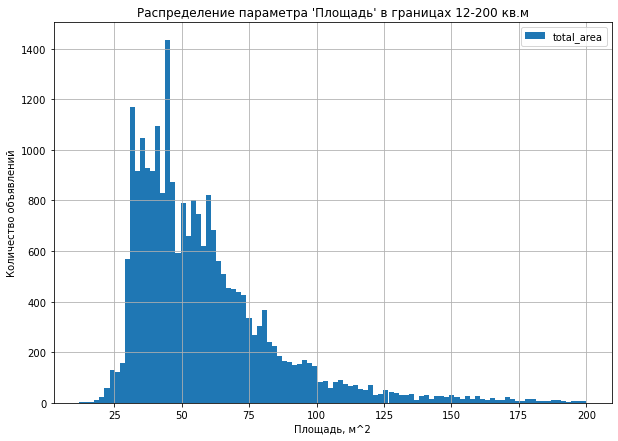

In [30]:
df.plot(kind ='hist', y='total_area', bins=100,range=(12,200), grid=True,figsize=(10,7))
plt.xlabel("Площадь, м^2")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Площадь' в границах 12-200 кв.м")
plt.show()

Далее будем работать с наблюдениями, удовлетворяющим условию: df.['total_area']<= 200'

#### Параметр "Цена"

Аналогично построим гистограмму для параметра "Цена":

In [31]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

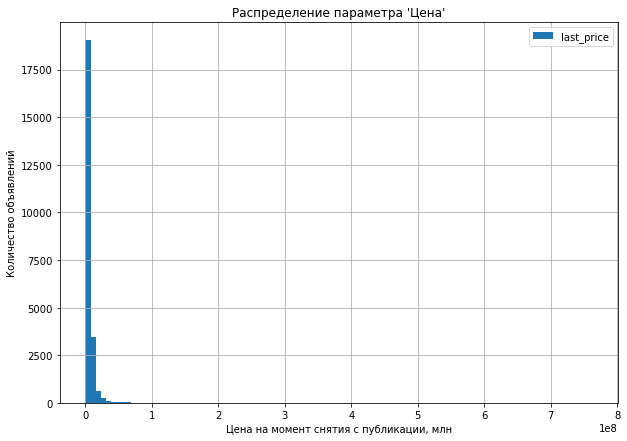

In [32]:
df.plot(kind ='hist', y='last_price', bins=100, grid=True, figsize=(10,7))
plt.xlabel("Цена на момент снятия с публикации, млн")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Цена'")
plt.show()

C помощью параметра range сделаем гисторамму более показательной:

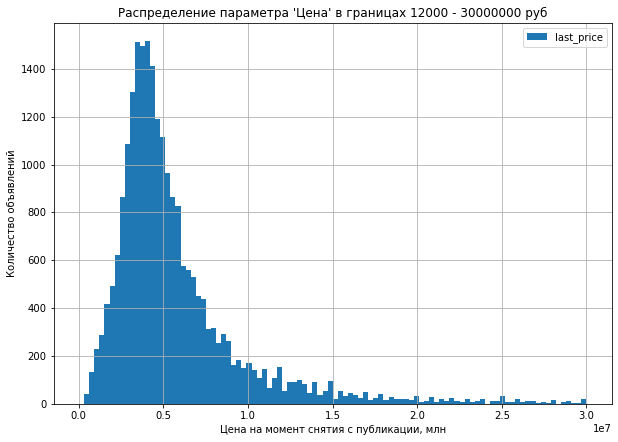

In [33]:
df.plot(kind ='hist', y='last_price', bins=100, range=(12000, 30000000), grid=True, figsize=(10,7))
plt.xlabel("Цена на момент снятия с публикации, млн")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Цена' в границах 12000 - 30000000 руб")
plt.show()

Гистограмма в целом похожа на нормальное распределение.

Не типично маленькую и большую стоимость признаем выбросами и отбросим. Для этого посмотрим на гистограмму-стоимость более 20 000 000 встречается редко, возьмём её за верхнуюю границу. Цена в 12000 руб. тоже кажется подозрительной, но пока оставим как есть.

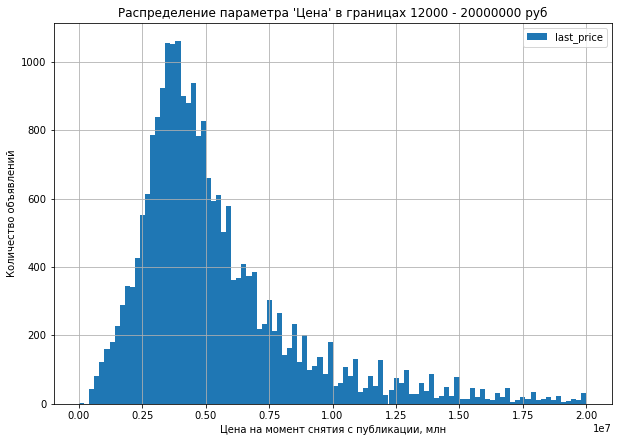

In [34]:
df.plot(kind ='hist', y='last_price', bins=100, range=(12000, 20000000), grid=True, figsize=(10,7))
plt.xlabel("Цена на момент снятия с публикации, млн")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Цена' в границах 12000 - 20000000 руб")
plt.show()

#### Параметр "Число комнат"

Построим гистограмму для параметра "Число комнат", предварительно посмотрев с помощью функций min() и max() между какими значениями она будет построена.

In [35]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

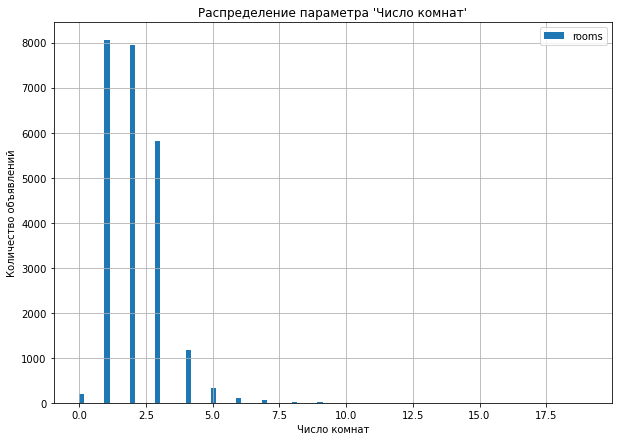

In [36]:
df.plot(kind ='hist', y='rooms', bins=100, grid=True, figsize=(10,7))
plt.xlabel("Число комнат")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Число комнат'")
plt.show()

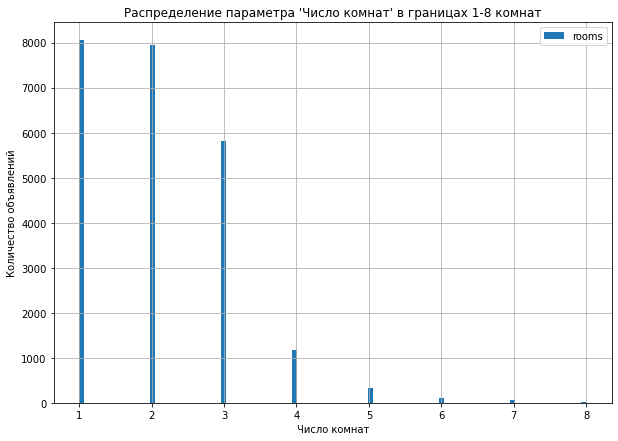

In [37]:
df.plot(kind ='hist', y='rooms', bins=100, range=(1,8), grid=True, figsize=(10,7))
plt.xlabel("Число комнат")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Число комнат' в границах 1-8 комнат")
plt.show()

Значения в столбце rooms меньше 1  и 8  - будем считать выбросами и отбросим их с помощью среза:

(df['rooms']>=1) & (df['rooms'] <=8)

#### Параметр "Высота потолков"

Построим гистограмму для параметра "Высота потолков":

In [38]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

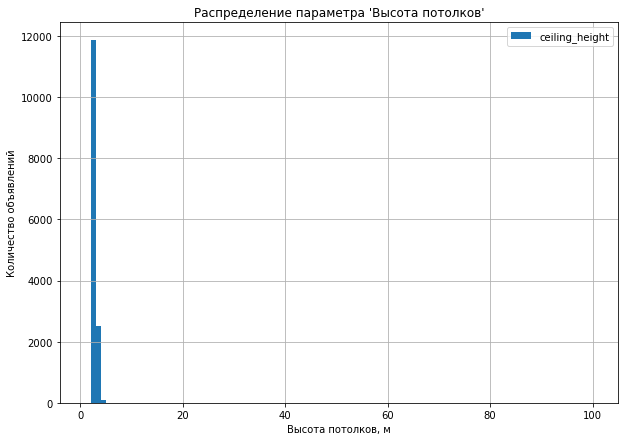

In [39]:
df.plot(kind ='hist', y='ceiling_height', bins=100, grid=True, figsize=(10,7))
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Высота потолков'")
plt.show()

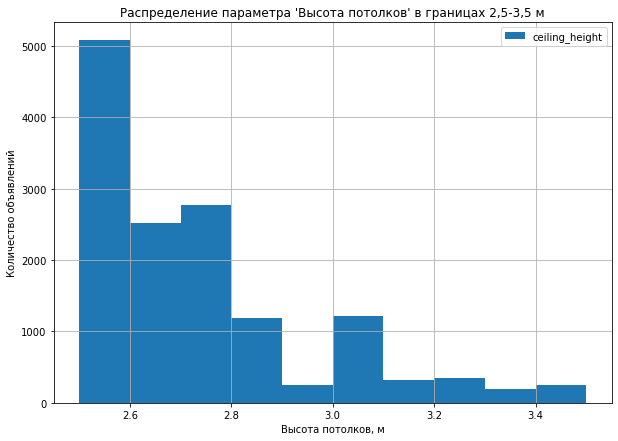

In [40]:
df.plot(kind ='hist', y='ceiling_height', bins=10, range=(2.5,3.5), grid=True, figsize=(10,7))
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Высота потолков' в границах 2,5-3,5 м")
plt.show()

Значения в столбце ceiling_height меньше 2,5 м и 3,5 метра - будем считать выбросами и отбросим их с помощью среза:

(df['ceiling_height']>=2.5) & (df['ceiling_height'] <=3.5)

####  Параметр "Время продажи квартиры"

In [41]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

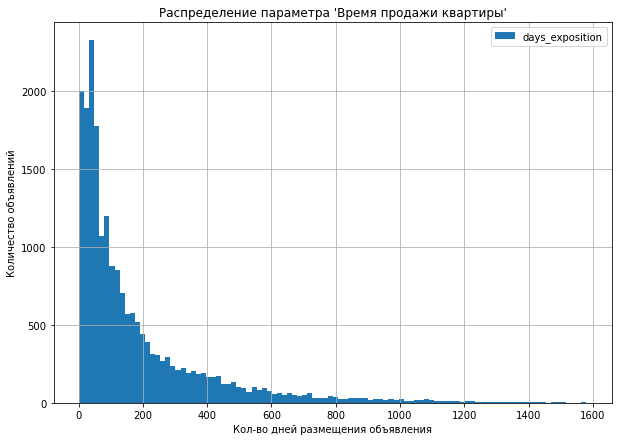

In [42]:
df.plot(kind ='hist', y='days_exposition', bins=100, grid=True, figsize=(10,7))
plt.xlabel("Кол-во дней размещения объявления")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Время продажи квартиры'")
plt.show()

Посмотрим на гисторграмму - значения после 1000 дней становятся крайне редки. Примем за верхнюю границу это значение и в дальнейшем будем использовать значения в столбце, удовлетворяющим условию: df.['days_exposition']<= 1000'

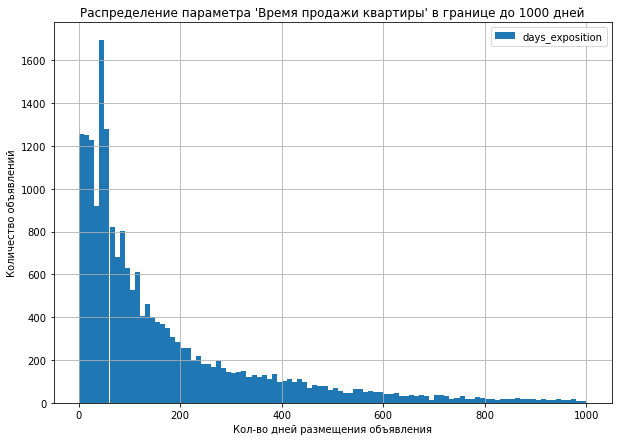

In [43]:
df.plot(kind ='hist', y='days_exposition', bins=100, range=(1,1000), grid=True, figsize=(10,7))
plt.xlabel("Кол-во дней размещения объявления")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Время продажи квартиры' в границе до 1000 дней")
plt.show()

Найдем медиану в столбце days_exposition, среднее, равное 180,9 дней- было найдено выше методом describe()  

In [44]:
round(df['days_exposition'].median(),1)

95.0

На основании графика и медианы можем сказать, что чаще всего продажи осуществляются в период до 200 дней- наиболее часто за 95 дней, реже в период с 200-400 дней, значительно меньше с 400-600 дней и незначительное кол-во продаж происходят в период с 600-1000 дней с момента публикации объявления. Продажи в период после 1000 дней, считаем выбросами и отбрасываем.

Посмотрим, как связаны длительность продажи и год публикации объявления:

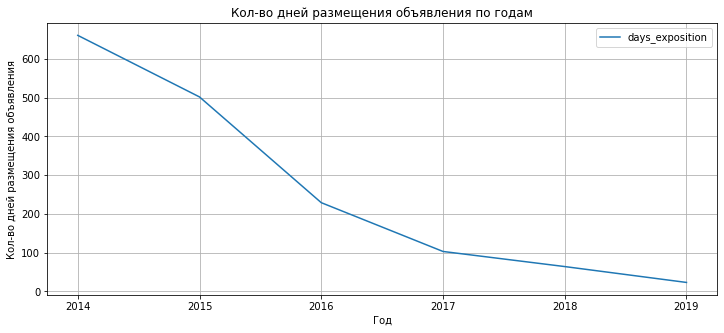

In [45]:
(
    df.query('days_exposition<=1000')
    .pivot_table(index='year_public', values='days_exposition', aggfunc='median')
    .plot(title='Кол-во дней размещения объявления по годам', grid=True, figsize=(12,5))
)
plt.xlabel("Год")
plt.ylabel("Кол-во дней размещения объявления")
plt.show()

Из графика чётко прослеживается зависимость - медианное время продажи с каждым годом становиться меньше.

Посмотрим, как связаны длительность продажи и месяц публикации объявления:

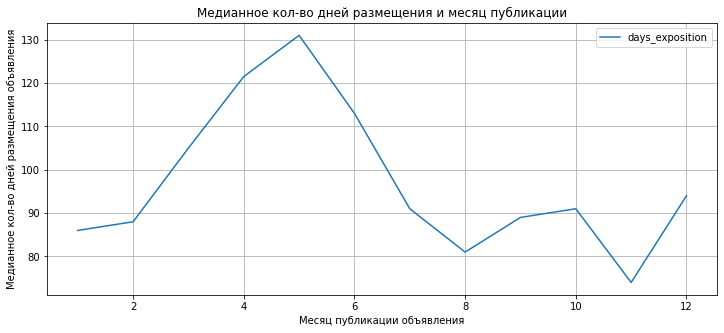

In [46]:
(
    df.query('days_exposition<=1000')
    .pivot_table(index='month_public', values='days_exposition', aggfunc='median')
    .plot(title='Медианное кол-во дней размещения и месяц публикации', grid=True, figsize=(12,5))
)
plt.xlabel("Месяц публикации объявления")
plt.ylabel("Медианное кол-во дней размещения объявления")
plt.show()

Инетерсно, что в разрезе месяцев максимальное медианное время продажи находится в районе 130 дней, тогда как в разрезе лет - оно превышает 600 дней.

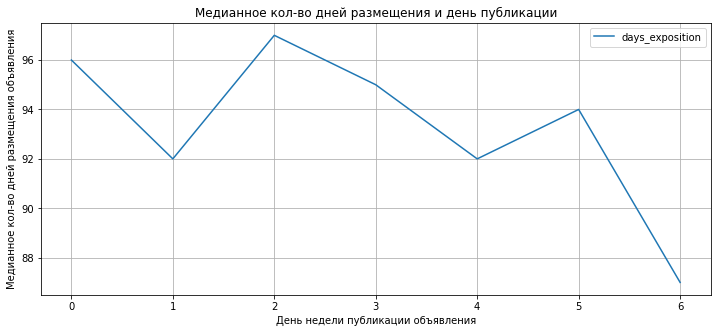

In [47]:
(
    df.query('days_exposition<=1000')
    .pivot_table(index='day_of_week_public', values='days_exposition', aggfunc='median')
    .plot(title='Медианное кол-во дней размещения и день публикации', grid=True, figsize=(12,5))
)
plt.xlabel("День недели публикации объявления")
plt.ylabel("Медианное кол-во дней размещения объявления")
plt.show()

В зависимости от дня недели, когда было опубликовано объявление - самые быстрые продажи - около 40 дней. Хотя, такие показатель, как день публикации не стоит сильно принимать во внимание, т.к. значительно большую роль играет год публикации, а точнее экономическая ситуация в течение года. 

##### Вывод

По найденным выше аномалиям, найденным в параметрах "Площадь", "Цена", "Число комнат", "Высота потолков", "Время продажи квартиры" сделаем срез данных и запишем их в новый датафрейм (для сохранения ресурсов памяти лучше обновить исходный датафрейм, но с целью сравения исходных и отфильтрованных данных запишем новый датафрейм): 

In [48]:
df_1 =(df[(df['total_area']<= 200) 
     &(df['last_price']<= 20000000)
     &(df['rooms']>=1) & (df['rooms'] <=8)
     &(df['ceiling_height']>=2.5) & (df['ceiling_height'] <=3.5)
     &(df['days_exposition']<= 1000)]    
    )
df_1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqm,day_of_week_public,month_public,year_public,floor_category,part_living_area,part_kitchen_area
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,Другой,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,289.0,88525.0,6,2,2017,Другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,2.0,553.0,137.0,127525.0,3,11,2017,Другой,0.512626,0.214646
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,3.0,298.0,366.0,82944.0,5,7,2017,Последний,0.630841,0.121495
16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,NaN,397.0,81707.0,3,11,2017,Первый,0.678049,0.109756


## Рассмотрим какие факторы больше всего влияют на стоимость квартиры.

##### "Площадь"

**Рассмотрим зависимость стоимости квартиры от площади:**

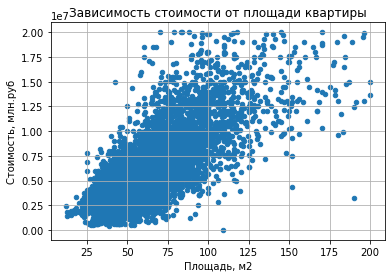

In [49]:
df_1.plot(title='Зависимость стоимости от площади квартиры',x='total_area', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Площадь, м2")
plt.ylabel("Стоимость, млн.руб")
plt.show()

Определим коэффициент кореляции для исходных данных и данным, отфильтрованным от выбрасов:

In [50]:
print(df['last_price'].corr(df['total_area'])) #исходные данные 

0.6536750579657242


In [51]:
print(df_1['last_price'].corr(df_1['total_area'])) #отфильтрованные данные

0.77182163209962


В результате видим, что после фильтрации данных от выбросов, зависимость стоимости от площади стала более очевидной. 

##### "Кол-во комнат"

**Рассмотрим зависмость стоимости квартиры от количества комнат:**

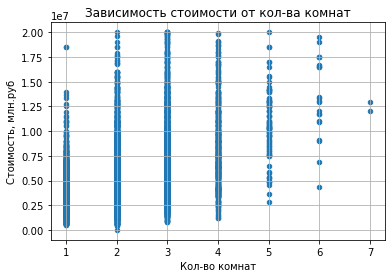

In [52]:
df_1.plot(title='Зависимость стоимости от кол-ва комнат',x='rooms', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Кол-во комнат")
plt.ylabel("Стоимость, млн.руб")
plt.show()

Определим коэффициент кореляции для исходных данных и данным, отфильтрованным от выбрасов:

In [53]:
print(df['last_price'].corr(df['rooms']))

0.3633428499648955


In [54]:
print(df_1['last_price'].corr(df_1['rooms']))

0.5008728943079482


Видим, что зависимость стоимости от кол-ва комнат слабая и фильтрация данных на коэф.кореляции не повлияла.  

Также по графику можем ещё раз увидеть, что наиболее часто встречаются объявления о продаже 1-4-х комнатных квартир. 

Вызывает удивление, что 2-4 комнатные квартиры имеют низкую стоимость, но для того, чтобы сделать более точный вывод, необходимо также учитывать связь с площадью, т.к. небольшая квартира тоже может быть разбита не 3-4 маленьких комнаты.

##### "Удалённость от центра"

**Рассмотрим зависмость стоимости квартиры от удалённости от центра:**

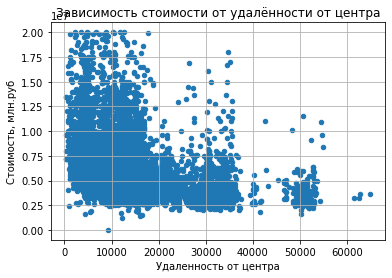

In [55]:
df_1.plot(title='Зависимость стоимости от удалённости от центра',x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
plt.xlabel("Удаленность от центра")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [56]:
print(df['last_price'].corr(df['cityCenters_nearest']))

-0.20674734874298364


In [57]:
print(df_1['last_price'].corr(df_1['cityCenters_nearest']))

-0.34430387443117333


Видим отрицательную зависимость, т.е. чем ближе к центру тем стоимость выше, но зависимость слабая. Фильтрация данных на корреляцию не повлияла.

##### Этажность квартиры

**Рассмотрим зависмость стоимости квартиры от категории этажа:**

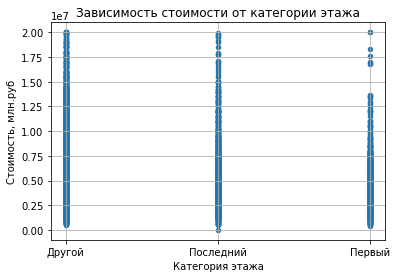

In [58]:
df_1.plot(title='Зависимость стоимости от категории этажа',x='floor_category', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Категория этажа")
plt.ylabel("Стоимость, млн.руб")
plt.show()

В случае с категорией этажа коэффициент корреляции найти в данном случае не можем, но по графику можем сделать вывод, что для категории "Первый этаж" стоимость чаще всего находится в пределах до 14 000 000,стоимость выше встречается редко. Для категорий "Последний" и "Другой" стоимость почти равномерно распределена по всему ценовому диапазоуну, но для категрии "Последний" чуть меньше объявлений в диапазоне 15 000 000-20 000 000, чем в аналогичном диапазоне для категории "Другой".

##### Период размещения объявления

**Рассмотрим зависмость стоимости квартиры от года размещения объявления:**

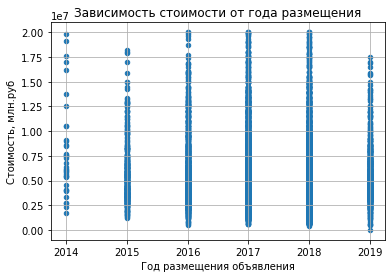

In [59]:
df_1.plot(title='Зависимость стоимости от года размещения',x='year_public', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Год размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [60]:
print(df['last_price'].corr(df['year_public']))

-0.043089036199508574


In [61]:
print(df_1['last_price'].corr(df_1['year_public']))

-0.05015120137345851


По графику и коэффициенту корреляции видим,что зависимость стоимости от года публикации очень слабая. По графику можем увидеть, что в 2019 году стоимость снизилась по сравнению с 2016-2018 годами и ограничивается примерно 17 500 000. Также на графике можем дополнительно увидеть, что объявлений в 2014 году было значительно меньше, чем в последующие годы.

**Рассмотрим зависмость стоимости квартиры от месяца размещения объявления:**

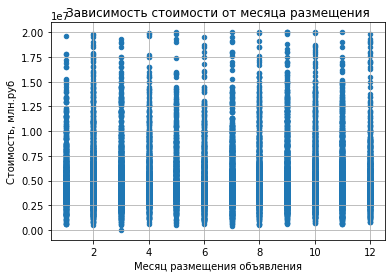

In [62]:
df_1.plot(title='Зависимость стоимости от месяца размещения',x='month_public', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Месяц размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [63]:
print(df['last_price'].corr(df['month_public']))

0.0027791287507397235


In [64]:
print(df_1['last_price'].corr(df_1['month_public']))

0.011170568192095573


По графику и коэффициенту корреляции видим,что зависимости стоимости от месяца публикации практически нет.

**Рассмотрим зависмость стоимости квартиры от дня недели размещения объявления:**

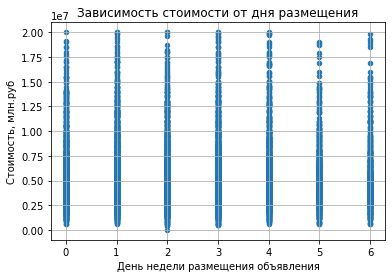

In [65]:
df_1.plot(title='Зависимость стоимости от дня размещения',x='day_of_week_public', y='last_price', kind='scatter', grid=True) 
plt.xlabel("День недели размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [66]:
print(df['last_price'].corr(df['day_of_week_public']))

0.0015501452176215438


In [67]:
print(df_1['last_price'].corr(df_1['day_of_week_public']))

-0.01549620317663499


По графику и коэффициенту корреляции видим, что зависимости стоимости от дня недели публикации объявления практически нет.

##### Вывод

**Наибольшее влияние на стоимость квартиры по сравнению с другими параметрами (кол-во комнат, этаж, удалённость от центра), оказывает параметр площади квартиры. Период публикации объявления на стоимость квартиры практически не влияет.**

##  10 населённых пунктов с наибольшим числом объявлений

Найдём 10 населённых пунктов с наибольшим числом объявлений:

In [68]:
df_1['locality_name'].value_counts().head(10)

Санкт-Петербург      7709
Всеволожск            215
посёлок Мурино        193
посёлок Шушары        186
Колпино               177
Пушкин                175
Гатчина               125
Петергоф              121
посёлок Парголово     118
деревня Кудрово       115
Name: locality_name, dtype: int64

Найдём среднюю стоимость квадратного метра жилья в населённых пунктах из Top-10 по числу объявлений:

In [69]:
top_10= (
    df_1
    .query('locality_name in ["Санкт-Петербург","Всеволожск", "посёлок Мурино", "посёлок Шушары", "Колпино", "Пушкин", "Гатчина", "Петергоф", "посёлок Парголово", "деревня Кудрово"]')
    .groupby('locality_name')['price_sqm'].mean()
    .sort_values(ascending=False)
)
top_10

locality_name
Санкт-Петербург      107201.123751
Пушкин               100027.422857
деревня Кудрово       90522.339130
посёлок Парголово     89542.305085
посёлок Мурино        87300.507772
Петергоф              82908.867769
посёлок Шушары        78462.209677
Колпино               75053.175141
Гатчина               69179.904000
Всеволожск            66297.562791
Name: price_sqm, dtype: float64

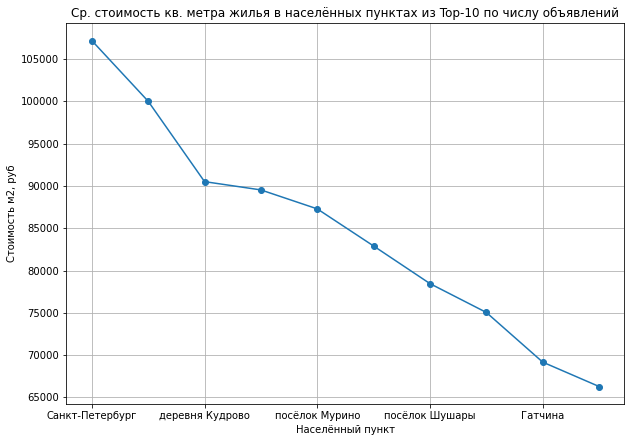

In [70]:
top_10.plot(xlabel = 'Населённый пункт', style='o-', grid=True,figsize=(10,7) )
plt.title("Ср. стоимость кв. метра жилья в населённых пунктах из Top-10 по числу объявлений")
plt.xlabel("Населённый пункт")
plt.ylabel("Стоимость м2, руб")
plt.show()

##### Вывод

В результате вычислений видим, что максимальная стоимость кв.метра в Санкт-Питербурге равная 107201 руб., а меньшая стоимость из десяти населённых пунктов по числу объявлений - во Всеволожске, равная 66297 руб.

####  Квартиры в Санкт-Питербурге

Выделим данные о квартирах в Санкт-Питербурге в отдельную таблицу:

In [71]:
spb = df_1[df_1['locality_name']=='Санкт-Петербург']

In [100]:
spb['dist_center_km'] = round(spb['cityCenters_nearest']/1000)
import warnings
warnings.simplefilter('ignore')

Посчитаем среднюю цену за кв.метр жилья для каждого километра: 

In [73]:
spb_mean_price_sqm =spb.pivot_table(index ='dist_center_km', values ='price_sqm').reset_index()
spb_mean_price_sqm

,dist_center_km,price_sqm
0,0.0,105223.666667
1,1.0,126654.276316
2,2.0,119522.578947
3,3.0,108150.013889
4,4.0,119927.389892
5,5.0,126355.375723
6,6.0,121645.594828
7,7.0,119941.120482
8,8.0,120631.402062
9,9.0,110953.269737


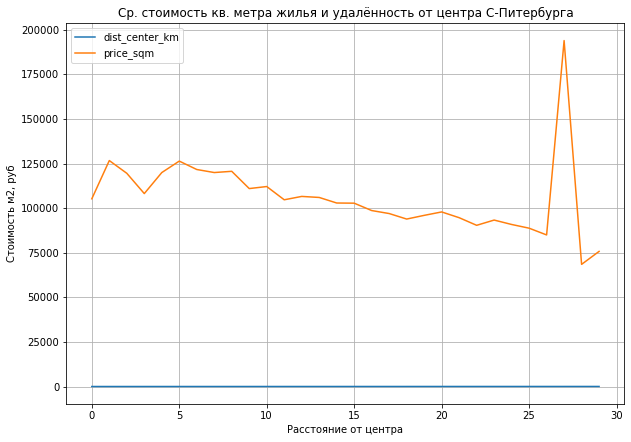

In [107]:
spb_mean_price_sqm.plot(xlabel = 'Расстояние от центра', grid=True, figsize=(10,7))
plt.title("Ср. стоимость кв. метра жилья и удалённость от центра С-Питербурга")
plt.ylabel("Стоимость м2, руб")
plt.show()

##### Вывод

Постоянное снижение стоимости за кв.м наблюдается с 5 км от центра города, из чего можно сделать вывод,что зона до 5 км входит в центр Санкт-Питербурга.

#### Центр Санкт-Питербурга

Выделим квартиры, находящиеся в центре Санкт-Питербурга:

In [75]:
spb_center= spb[spb['dist_center_km']<=5]

Рассмотрим параметры квартир, находящихся в центре:

##### Параметр "Площадь"

Построим гистограмму для параметра "Площадь", предварительно посмотрев с помощью функций min() и max() между какими значениями она будет построена.

In [76]:
spb_center['total_area'].describe()

count    963.000000
mean      78.855223
std       31.032035
min       12.000000
25%       56.100000
50%       73.450000
75%       97.250000
max      195.700000
Name: total_area, dtype: float64

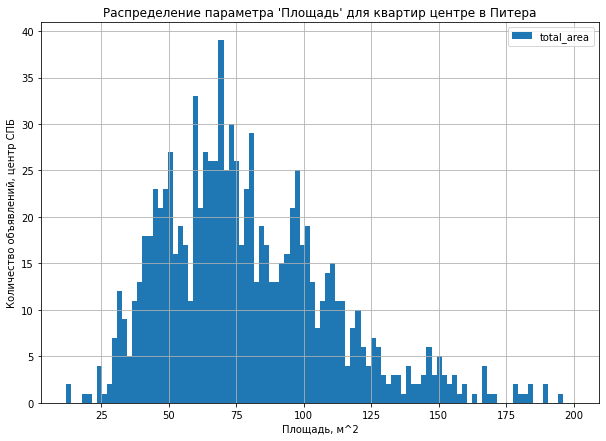

In [110]:
spb_center.plot(kind ='hist', y='total_area', bins=100,range=(12,200), grid=True, figsize=(10,7))
plt.xlabel("Площадь, м^2")
plt.ylabel("Количество объявлений, центр СПБ")
plt.title("Распределение параметра 'Площадь' для квартир центре в Питера")
plt.show()

Вспомним вид гистограммы по исходным данным:

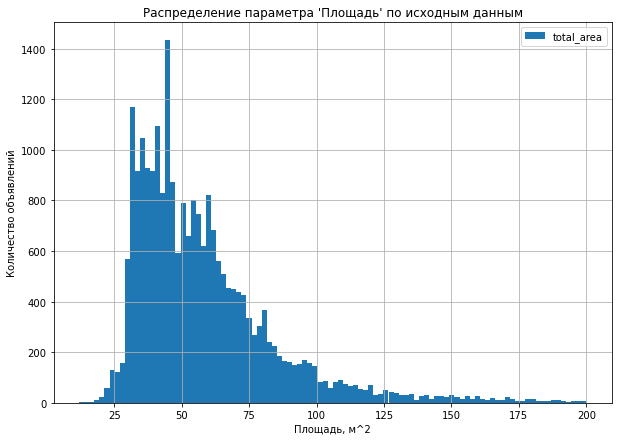

In [111]:
df.plot(kind ='hist', y='total_area', bins=100,range=(12,200), grid=True, figsize=(10,7))
plt.xlabel("Площадь, м^2")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Площадь' по исходным данным")
plt.show()

Видим, что в центре Санкт-Питербурга чаще всего встречаются квартиры с площадью 70 кв.м, а также достаточно часто встречается 40-45 кв.м, по всем объявлениям видим что эта величина составляет около 45 кв.м.  

##### Параметр "Цена"

Аналогичные рассчёты сделаем для параметра "Цена" для центра Санкт-Питербурга: 

In [79]:
spb_center['last_price'].describe()

count    9.630000e+02
mean     9.093068e+06
std      3.507949e+06
min      1.600000e+06
25%      6.500000e+06
50%      8.470000e+06
75%      1.100000e+07
max      2.000000e+07
Name: last_price, dtype: float64

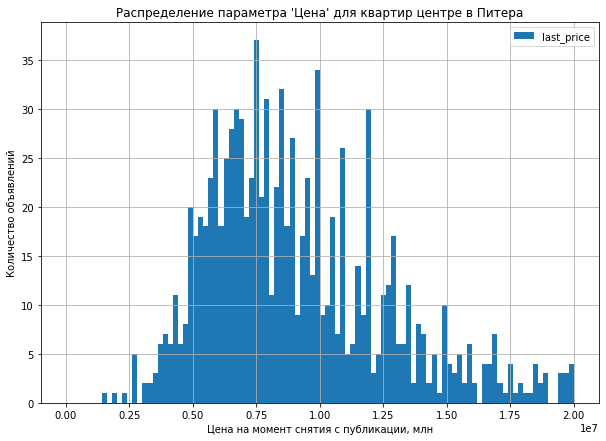

In [112]:
spb_center.plot(kind ='hist', y='last_price', bins=100, range=(12000, 20000000), grid=True, figsize=(10,7))
plt.xlabel("Цена на момент снятия с публикации, млн")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Цена' для квартир центре в Питера")
plt.show()

Вспомним вид гистограммы по исходным данным:

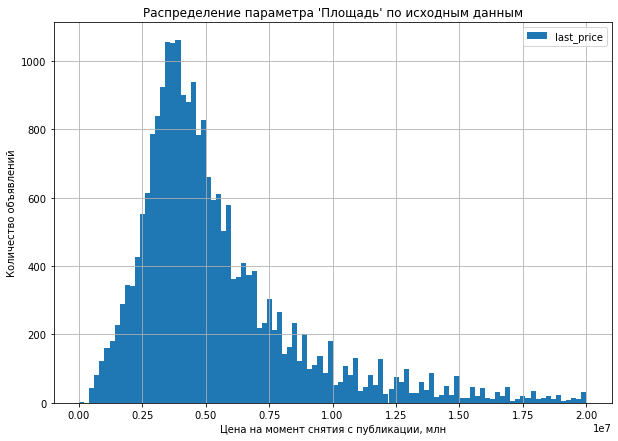

In [113]:
df.plot(kind ='hist', y='last_price', bins=100, range=(12000, 20000000), grid=True,figsize=(10,7))
plt.xlabel("Цена на момент снятия с публикации, млн")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Цена' по исходным данным")
plt.show()

Видим, что для центра Санкт-Питербурга наиболее часто встречается цена около 8 000 000,

по всем данных этот показатель ниже - около 3-3 500 000.

##### Параметр "Число комнат"

In [82]:
spb_center['rooms'].describe()

count    963.000000
mean       2.711319
std        1.158780
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        7.000000
Name: rooms, dtype: float64

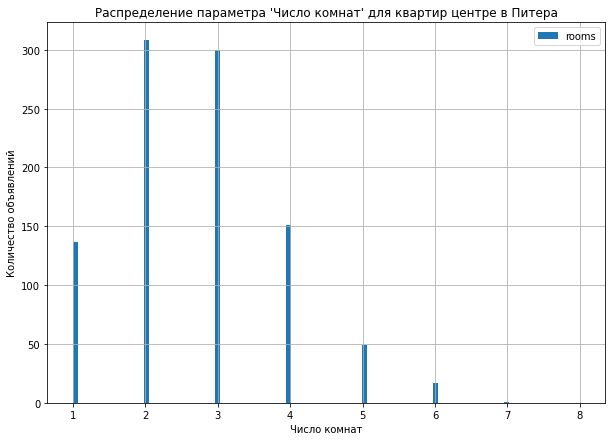

In [114]:
spb_center.plot(kind ='hist', y='rooms', bins=100,range=(1,8), grid=True, figsize=(10,7))
plt.xlabel("Число комнат")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Число комнат' для квартир центре в Питера")
plt.show() 

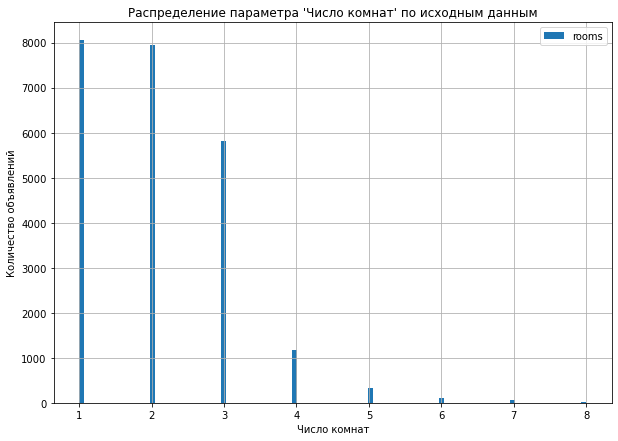

In [118]:
df.plot(kind ='hist', y='rooms', bins=100,range=(1,8), grid=True, figsize=(10,7))
plt.xlabel("Число комнат")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Число комнат' по исходным данным")
plt.show()

В центре города чаще всего встречаются 2-3 комнатные квартиры, тогда как для все объявлений также часто встречается и 1-комнатные квартиры.

##### Параметр "Высота потолков"

In [85]:
spb_center['ceiling_height'].describe()

count    963.000000
mean       3.034808
std        0.252560
min        2.500000
25%        2.820000
50%        3.000000
75%        3.200000
max        3.500000
Name: ceiling_height, dtype: float64

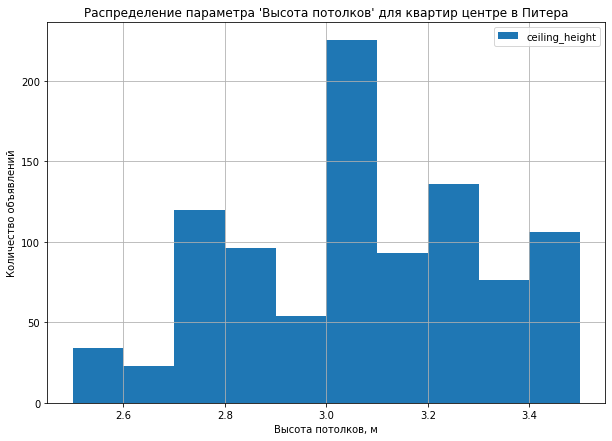

In [116]:
spb_center.plot(kind ='hist', y='ceiling_height', bins=10, range=(2.5,3.5), grid=True, figsize=(10,7))
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Высота потолков' для квартир центре в Питера")
plt.show()

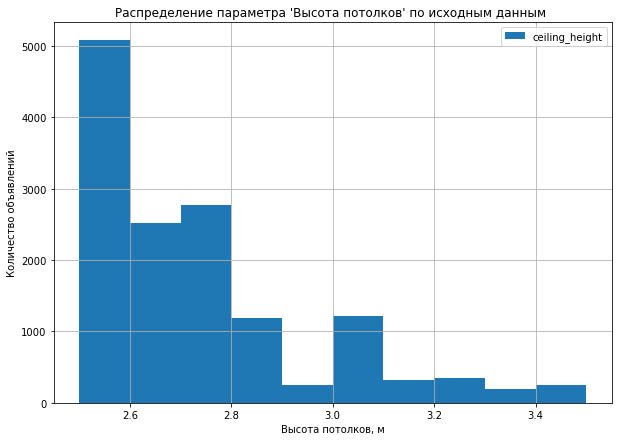

In [117]:
df.plot(kind ='hist', y='ceiling_height', bins=10, range=(2.5,3.5), grid=True, figsize=(10,7))
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений")
plt.title("Распределение параметра 'Высота потолков' по исходным данным ")
plt.show()

Видим существенную разницу между высотой потолков в центре Санкт-Питербурга и остальными объявлениями в базе. Для центра города наиболее характерны 2,8 м и 3-х метровые потолки, тогда как для объявлений по всей базе максимальное количество объявлений находится в пределах до 2,6 м и намного реже до 2,8 м. Потолки выше 2,8 - встречаются редко.

####  Какие факторы больше всего влияют на стоимость квартиры в центре Санкт-Питербурга ? 

**Рассмотрим зависмость стоимости квартиры от количества комнат:**

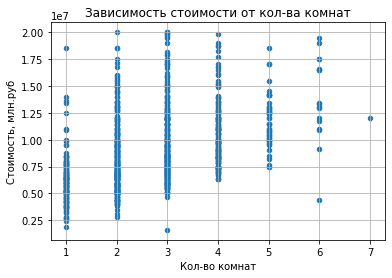

In [119]:
spb_center.plot(title='Зависимость стоимости от кол-ва комнат',x='rooms', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Кол-во комнат")
plt.ylabel("Стоимость, млн.руб")
plt.show()

Определим коэффициент кореляции:

In [89]:
print(spb_center['last_price'].corr(spb_center['rooms']))

0.44657487747056307


Видим, по графику и коэффициенту корреляции, что есть зависимость между площадью и количеством комнат есть, но слабая. Кроме того зависимость чуть ниже, чем по всем объявлениям в базе, где коф. корреляции 0,5

**Рассмотрим зависмость стоимости квартиры от этажа:**

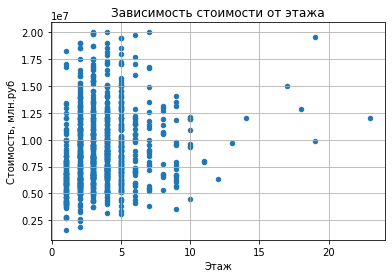

In [120]:
spb_center.plot(title='Зависимость стоимости от этажа',x='floor', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Этаж")
plt.ylabel("Стоимость, млн.руб")
plt.show()

Определим коэффициент кореляции:

In [91]:
print(spb_center['last_price'].corr(spb_center['floor'])) 

0.15138528076970062


По графику и коэффициенту корреляции видим, что в целом влияния этажа на стоимость квартиры нет. 

**Рассмотрим зависмость стоимости квартиры от удалённости от центра:**

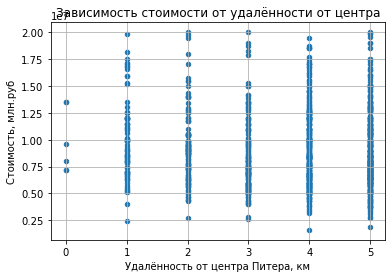

In [121]:
spb_center.plot(title='Зависимость стоимости от удалённости от центра', x='dist_center_km', y='last_price', kind='scatter', grid=True)
plt.xlabel("Удалённость от центра Питера, км")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [93]:
print(spb_center['last_price'].corr(spb_center['dist_center_km'])) 

-0.057162140633829496


По графику и коэф.корреляции видим,что зависимости стоимости от удалённости от центра практически нет. Что отличается от в объявлений по базе в целом, где есть слабая отрицательная зависимость - чем ближе к центру тем стоимость выше.

Скорее, удаленность от центра в центральной зоне Санкт-Питербурга влияет на количество самих объявлений - чем ближе к самому центру Санкт-Питербурга, тем меньше объявлений о продаже.

**Рассмотрим зависмость стоимости квартиры от года размещения объявления:**

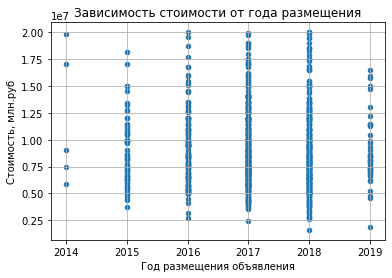

In [122]:
spb_center.plot(title='Зависимость стоимости от года размещения',x='year_public', y='last_price', kind='scatter', grid=True) 
plt.xlabel("Год размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [95]:
print(spb_center['last_price'].corr(spb_center['year_public']))

-0.039787873742946844


**Рассмотрим зависмость стоимости квартиры от месяца размещения объявления:**

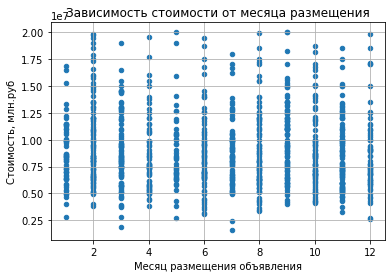

In [123]:
spb_center.plot(title='Зависимость стоимости от месяца размещения',x='month_public', y='last_price', kind='scatter', grid=True)
plt.xlabel("Месяц размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [97]:
print(spb_center['last_price'].corr(spb_center['month_public']))

-0.03206911391256399


**Рассмотрим зависмость стоимости квартиры от дня недели размещения объявления:**

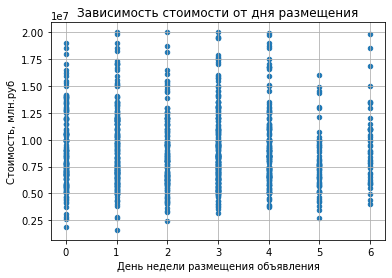

In [124]:
spb_center.plot(title='Зависимость стоимости от дня размещения',x='day_of_week_public', y='last_price', kind='scatter', grid=True)
plt.xlabel("День недели размещения объявления")
plt.ylabel("Стоимость, млн.руб")
plt.show()

In [99]:
print(spb_center['last_price'].corr(spb_center['day_of_week_public']))

-0.02227744404287884


По графикам и коэф.корреляции видно, что стоимость в центре не зависит от года, месяца и дня публикации, причем коэф. корреляции имеют небольшие  отличия в большую или меньшую сторону с данными по всей базе, но в целом, результат аналогичный. 